# Task 1. Working with data

## Project plan
- [ 1.1 Data loading and preparation ](#section1)
- [ 1.2. The duration column contains data on the film length. How many missing values are there in this column? ](#section2) 
- [ 1.3. Replace the missing values in the duration column with the median value for this column.](#section3) 
- [ 1.4. What is the average film length? Give the answer as a floating-point figure rounded to two decimal places. ](#section4) 
- [1.5. Create a movie_duration_category column, which will contain three categories depending on the film length. ](#section5) 
- [ 1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of films ](#section6) 
- [1.7. How many films between 90 minutes and two hours long were released in 2008? ](#section7) 
- [ 1.8. The plot_keywords column holds keywords characterizing the film's plot. Using the data in this column, create a column called movie_plot_category, to contain four categories depending on the key words in the column ](#section8) 
- [ 1.9. The imdb_score column shows a viewer rating for the film. Build a table to reflect the average rating of films depending on which movie_plot_category category they belong to. ](#section9) 
- [ 1.10. What is the average rating of films in the "love" category? Give the answer as a floatingpoint figure rounded to two decimal places. ](#section10) 
- [ 1.11. The budget column contains the film's budget. What is the median budget for all the films listed? Give the answer as an integer. ](#section11) 

<a id='section1'></a>
#### 1.1 Data loading and preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem

m = Mystem() 

df = pd.read_csv('movie_metadata.csv')

df = df[df['title_year'].notna()].reset_index().drop('index', axis=1)
df['plot_keywords'] = df['plot_keywords'].fillna('other')
df['title_year'] = df['title_year'].astype('int')
df.info()

# Data preprocessing
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4920 non-null   object 
 1   director_name              4935 non-null   object 
 2   num_critic_for_reviews     4894 non-null   float64
 3   duration                   4923 non-null   float64
 4   director_facebook_likes    4935 non-null   float64
 5   actor_3_facebook_likes     4917 non-null   float64
 6   actor_2_name               4925 non-null   object 
 7   actor_1_facebook_likes     4928 non-null   float64
 8   gross                      4156 non-null   float64
 9   genres                     4935 non-null   object 
 10  actor_1_name               4928 non-null   object 
 11  movie_title                4935 non-null   object 
 12  num_voted_users            4935 non-null   int64  
 13  cast_total_facebook_likes  4935 non-null   int64

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0$,2012,632.0,6.6,2.35,24000


<a id='section2'></a>
#### 1.2. The duration column contains data on the film length. How many missing values are there in this column? 

In [2]:
print('There are {} movies with missing duration'.format(df['duration'].isna().sum()))

There are 12 movies with missing duration


<a id='section3'></a>
#### 1.3. Replace the missing values in the duration column with the median value for this column.

Duration's boxplot shows skewness of data


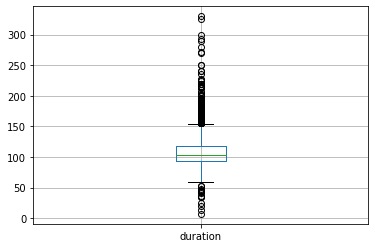

In [3]:
print('Duration\'s boxplot shows skewness of data')
df.boxplot(column='duration')
df['duration'] = df['duration'].fillna(df['duration'].median())


<a id='section4'></a>
#### 1.4. What is the average film length? Give the answer as a floating-point figure rounded to two decimal places.

In [4]:
print('The average duration of movies is', round(df['duration'].mean(),2))

The average duration of movies is 108.16


<a id='section5'></a>
#### 1.5. Create a movie_duration_category column, which will contain three categories depending on the film length: 
• Category "1. <90" if the film is less than 90 minutes long 

• Category "2. 90–120" if the film is between 90 minutes and two hours long (inclusively) 

• Category "3. >120" if the film is more than two hours long

In [5]:
def movie_duration_category(duration):
    if duration < 90:
        return "1. <90"
    elif 120 < duration > 90:
        return "2. 90-120"
    
    return "3. >120"

df['movie_duration_category'] = df['duration'].apply(movie_duration_category)
df['movie_duration_category'].value_counts()

3. >120      3179
2. 90-120    1059
1. <90        697
Name: movie_duration_category, dtype: int64

<a id='section6'></a>
#### 1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of films: 
• Table rows: year • Table columns: movie duration category ("<90", "90–120", ">120") 

• The year of release should be displayed in the YYYY format. 

In [6]:

pivot_table = df.query('title_year>=2000').pivot_table(index=['title_year'], columns=['movie_duration_category'], values=['duration'], aggfunc=['count'])
pivot_table

count                  
                        duration                  
movie_duration_category   1. <90 2. 90-120 3. >120
title_year                                        
2000                          25        34     112
2001                          29        39     120
2002                          36        27     146
2003                          31        30     108
2004                          30        42     142
2005                          31        48     142
2006                          40        53     146
2007                          31        43     130
2008                          29        36     160
2009                          42        40     178
2010                          26        33     171
2011                          36        39     150
2012                          41        41     139
2013                          38        54     145
2014                          36        45     171
2015                          34        47     145
2016                           8        19      79

<a id='section7'></a>
#### 1.7. How many films between 90 minutes and two hours long were released in 2008? 
• Table rows: year • Table columns: movie duration category ("<90", "90–120", ">120") 

• The year of release should be displayed in the YYYY format. 

In [7]:
print('There are {} movies released in 2008 with a duration of 90 to 120 minutes'.format(df.query('90 >= duration <=120 and title_year==2008').shape[0]))

There are 42 movies released in 2008 with a duration of 90 to 120 minutes


<a id='section8'></a>
#### 1.8. The plot_keywords column holds keywords characterizing the film's plot. 

Using the data in this column, create a column called movie_plot_category, to contain four categories 
depending on the key words in the column: 

• Category "love_and_death" if the keywords include both "love" and "death"

• Category "love" if the keywords include the word "love" 

• Category "death" if the keywords include the word "death" 

• Category "other" if the keywords do not meet the conditions above

In [8]:

df['plot_keywords'] = df['plot_keywords'].astype('string')

def movie_plot_category(plot_keywords):   
    lemmas = m.lemmatize(plot_keywords)    
    
    if 'love' in lemmas and 'death' in lemmas:
        return 'love_and_death'
    elif 'love' in lemmas:
        return 'love'
    elif 'death' in lemmas:
        return 'death'
    return 'other'


df['movie_plot_category'] = df['plot_keywords'].apply(movie_plot_category)
print('Number of movies by plot category')
df['movie_plot_category'].value_counts()

Number of movies by plot category


other             4531
love               223
death              170
love_and_death      11
Name: movie_plot_category, dtype: int64

<a id='section9'></a>
#### 1.9. The imdb_score column shows a viewer rating for the film. Build a table to reflect the average rating of films depending on which movie_plot_category category they belong to.

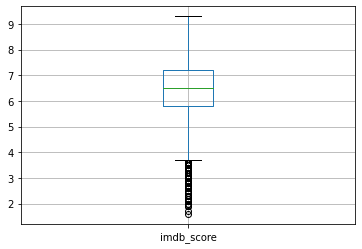

Avegare IMDB rating by plot category


,imdb_score
movie_plot_category,
death,7.0
love,7.0
love_and_death,7.0
other,6.0


In [9]:
df.boxplot(column='imdb_score')
plt.show()

print('Avegare IMDB rating by plot category')
df.groupby('movie_plot_category').agg({'imdb_score':'median'}).round()

<a id='section10'></a>
#### 1.10. What is the average rating of films in the "love" category? Give the answer as a floatingpoint figure rounded to two decimal places. 

In [10]:
print('The average rating of movies about "Love" is {}'.format(round(df.query('movie_plot_category=="love"')['imdb_score'].median(),2)))

The average rating of movies about "Love" is 6.7


<a id='section11'></a>
#### 1.11. The budget column contains the film's budget. What is the median budget for all the films listed? Give the answer as an integer.

In [11]:

print('The median budget of all movies listed above is {}'.format(round(df['budget'].replace('[\$,]', '', regex=True).median()   )) )

The median budget of all movies listed above is 16000000
